In [33]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [34]:
data_path = os.getcwd() + "\Data\Transformed_Data\goalkeepers_correlated.csv"

df = pd.read_csv(data_path)
df.head()

,Season,name,position,team,total_points,bps,clean_sheets,minutes,bonus,influence,ict_index,saves,value,selected,penalties_saved,transfers_in
0,2021-22,David de Gea,GK,Man Utd,2,17,0,90,0,34.4,3.4,5,50,473518,0,19470
1,2021-22,Tom Heaton,GK,Man Utd,0,0,0,0,0,0.0,0.0,0,40,42318,0,222
2,2021-22,Dean Henderson,GK,Man Utd,0,0,0,0,0,0.0,0.0,0,47,36124,0,71
3,2021-22,Bernd Leno,GK,Arsenal,0,0,0,0,0,0.0,0.0,0,46,83324,0,321
4,2021-22,Aaron Ramsdale,GK,Arsenal,3,23,0,90,0,47.4,4.7,7,49,1125402,0,74772


<AxesSubplot:>

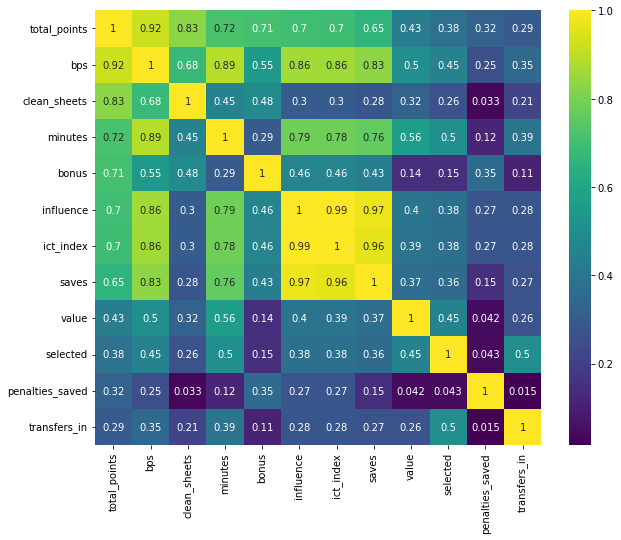

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9167 entries, 0 to 9166
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           9167 non-null   object 
 1   name             9167 non-null   object 
 2   position         9167 non-null   object 
 3   team             9167 non-null   object 
 4   total_points     9167 non-null   int64  
 5   bps              9167 non-null   int64  
 6   clean_sheets     9167 non-null   int64  
 7   minutes          9167 non-null   int64  
 8   bonus            9167 non-null   int64  
 9   influence        9167 non-null   float64
 10  ict_index        9167 non-null   float64
 11  saves            9167 non-null   int64  
 12  value            9167 non-null   int64  
 13  selected         9167 non-null   int64  
 14  penalties_saved  9167 non-null   int64  
 15  transfers_in     9167 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 1.1+ MB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_points,9167.0,1.371550,2.490709,-3.0,0.0,0.0,2.0,16.0
bps,9167.0,6.811280,9.983379,-7.0,0.0,0.0,14.0,54.0
clean_sheets,9167.0,0.105596,0.307337,0.0,0.0,0.0,0.0,1.0
minutes,9167.0,33.220137,43.339547,0.0,0.0,0.0,90.0,90.0
bonus,9167.0,0.107342,0.478467,0.0,0.0,0.0,0.0,3.0
influence,9167.0,8.332235,13.811704,0.0,0.0,0.0,14.4,102.8
ict_index,9167.0,0.847627,1.407785,0.0,0.0,0.0,1.5,10.4
saves,9167.0,1.081161,1.850324,0.0,0.0,0.0,2.0,14.0
value,9167.0,45.662049,4.898880,39.0,42.0,45.0,49.0,63.0
selected,9167.0,238444.637395,399008.206757,0.0,9576.0,55744.0,309691.0,3383221.0


Let's look at the distribution of total points.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

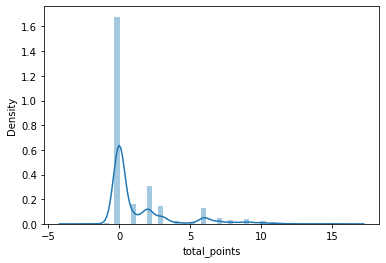

In [38]:
sns.distplot(df['total_points'])

We can see that there are a large amount of 0 total_points entries, we need to check if this is because they did not play any minutes.

In [39]:
print('Not Played: ', len(df[df['minutes']==0]))
print('Played: ', len(df[df['minutes']!=0]))
print('% Not Played: ', len(df[df['minutes']==0])/len(df)*100,'%')

Not Played:  5753
Played:  3414
% Not Played:  62.75771790116723 %


We need to remove 62.7% of our data points... not good! We may have to consider combining goalkeepers and defenders as we only have 3,414 goalkeeper datapoints.

In [40]:
df = df[df['minutes']!=0]
df.head()

,Season,name,position,team,total_points,bps,clean_sheets,minutes,bonus,influence,ict_index,saves,value,selected,penalties_saved,transfers_in
0,2021-22,David de Gea,GK,Man Utd,2,17,0,90,0,34.4,3.4,5,50,473518,0,19470
4,2021-22,Aaron Ramsdale,GK,Arsenal,3,23,0,90,0,47.4,4.7,7,49,1125402,0,74772
10,2021-22,Hugo Lloris,GK,Spurs,7,26,1,90,1,20.4,2.0,2,54,743921,0,13230
12,2021-22,Álvaro Fernández,GK,Brentford,2,20,0,90,0,38.8,3.9,5,45,50139,0,5442
20,2021-22,Jordan Pickford,GK,Everton,1,15,0,90,0,18.8,1.9,3,50,384835,0,878


C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

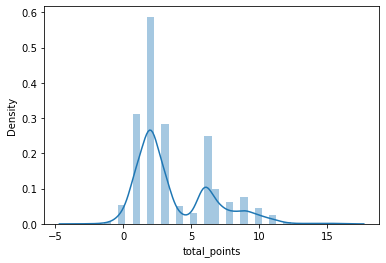

In [41]:
#let's look at our dist plot again
sns.distplot(df['total_points'])

In [42]:
df['total_points'].value_counts().sort_values()

-3        1
-2        2
 16       3
 13       3
 15       6
 14       6
 12       9
-1       11
 11      46
 5       56
 10      82
 4       89
 0       95
 8      111
 9      137
 7      176
 6      449
 3      512
 1      562
 2     1058
Name: total_points, dtype: int64

We can see that the most frequent score for a goalkeeper is 2 points.

Let's investigate the relationship between price and total points to see if you get bang for your buck with goalkeepers.

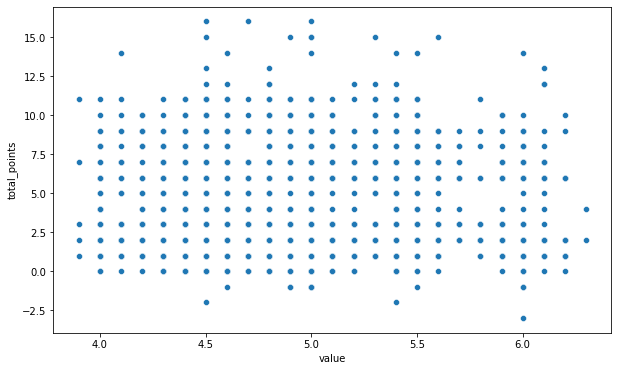

In [43]:
#scale the value column to reflect prices in the game
df['value'] = df['value'] / 10

plt.figure(figsize=(10,6))
sns.scatterplot(x='value',y='total_points',data=df)
plt.show()

As we can see there is very little correlation between value and total_points, later on we may need to consider that it is not worth buying an expensive goalkeeper. 

To check this lets look at total_points per season for each team's goalkeeper.

In [44]:
players = df[['team', 'Season', 'total_points', 'value']]
players.head()

,team,Season,total_points,value
0,Man Utd,2021-22,2,5.0
4,Arsenal,2021-22,3,4.9
10,Spurs,2021-22,7,5.4
12,Brentford,2021-22,2,4.5
20,Everton,2021-22,1,5.0


In [45]:
players = players.groupby(['team', 'Season']).agg({'total_points': 'sum', 'value': 'mean'})
players.reset_index(inplace=True)
players.sort_values(by='total_points')

,team,Season,total_points,value
38,Fulham,2020-21,2,4.400000
73,Sheffield Utd,2019-20,3,4.350000
37,Fulham,2018-19,8,4.500000
20,Chelsea,2017-18,11,4.800000
91,West Brom,2018-19,15,4.000000
...,...,...,...,...
33,Everton,2018-19,260,4.710145
97,West Ham,2020-21,267,4.756757
32,Everton,2017-18,280,4.748684
62,Man Utd,2019-20,362,5.020213


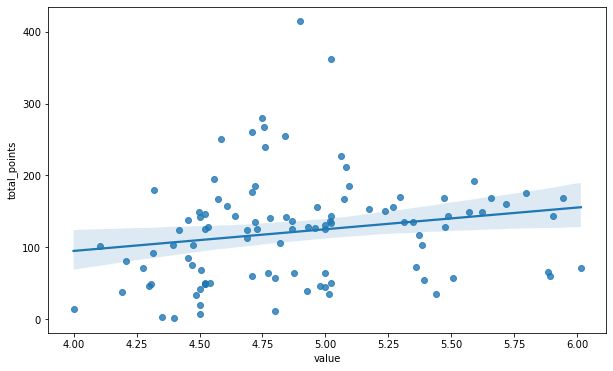

In [46]:
plt.figure(figsize=(10,6))
sns.regplot(x='value',y='total_points',data=players)
plt.show()

We can see that over the course of a season (Assuming a team stays with same goalkeeper) that there is an increase in total points with price but only a slight increase, also the highest scoring GK's are around the mid price mark of 5m.

Let's investigate is it matters which team you get your goalkeeper from.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

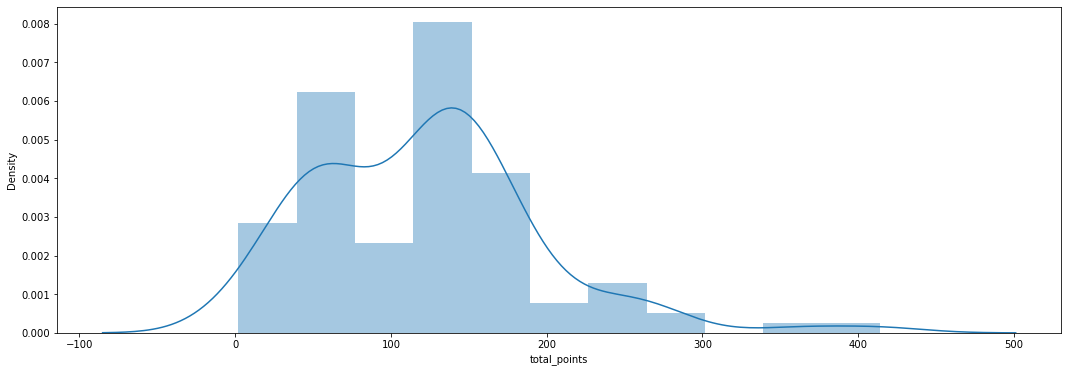

In [47]:
plt.figure(figsize=(18,6))
sns.distplot(players['total_points'])

In [48]:
print(len(df[(df['team']=='Man Utd') & (df['Season']=='2016-17')]))
df[(df['team']=='Man Utd') & (df['Season']=='2016-17')]['name'].value_counts()

100


Tom Heaton       35
David de Gea     35
Lee Grant        28
Sergio Romero     2
Name: name, dtype: int64

We can see that the outliers are due to our previous naming convention, where we assign a players most recent team. Let's find all instances of this and correct the team names.

In [49]:
#first we need to find the goalkeepers with incorrect teams
player_check = df[['team', 'Season', 'name']].groupby(by=['team', 'Season']).count().reset_index().sort_values(by='name',ascending=False)
print(len(player_check[player_check['name'] > 38]))
player_check[player_check['name'] > 38]

28


,team,Season,name
59,Man Utd,2016-17,100
62,Man Utd,2019-20,94
32,Everton,2017-18,76
2,Arsenal,2020-21,74
97,West Ham,2020-21,74
33,Everton,2018-19,69
1,Arsenal,2019-20,67
14,Burnley,2017-18,62
93,West Ham,2016-17,59
81,Spurs,2017-18,56


We need to manually correct 28 Season's team's goalkeepers. Sigh..

This is too much effort for one piece of analysis, and we would use the quartile rating system in our final model not specific teams. So let's move on.

Let's have a look at how stable the transfers_in variable is, as when inputting to the model we will have to predict this by aggregating player past performance.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transfers_in', ylabel='Density'>

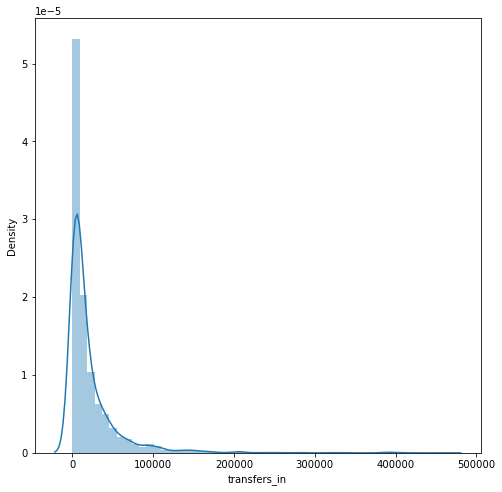

In [50]:
plt.figure(figsize=(8,8))
sns.distplot(df['transfers_in'])

This variable has a lot a zero data points this could mean it has good discriminatory power so we will leave this variable in.

Let's have a look at selected vs total_points, i.e. are the general public good at choosing goalkeepers?

<AxesSubplot:xlabel='total_points', ylabel='selected'>

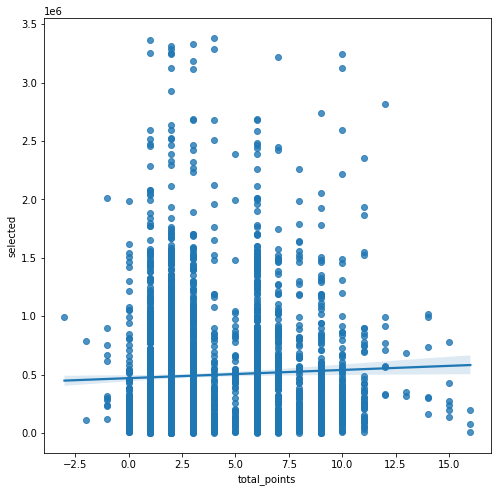

In [58]:
plt.figure(figsize=(8,8))
sns.regplot(x='total_points', y='selected', data=df)

There is a slight correlation but in general the public is not good at selecting GKs.

Finally let's look at saves vs total_points

<AxesSubplot:xlabel='saves', ylabel='total_points'>

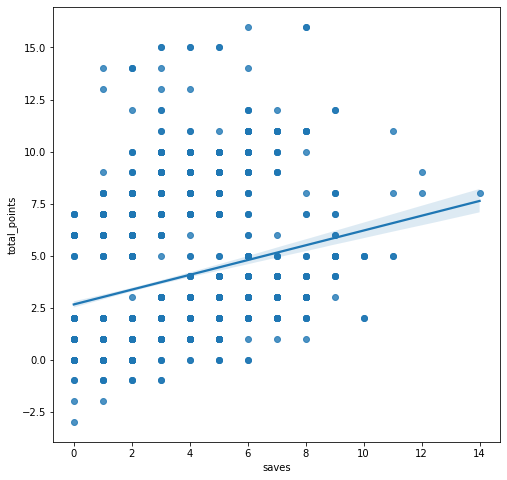

In [59]:
plt.figure(figsize=(8,8,))
sns.regplot(x='saves', y='total_points', data=df)

As expected this shows good correlation. unlike the other variables we looked at saves is a dependent variable for total_points. However, it is a step function, no points are awarded until 3 saves are made, then it increases in multiples of 3 linearly.

<h1>Let's save the datasets again based on what we found out</h1>

In [62]:
data_path = os.getcwd() + "\Data\Transformed_Data"

goalkeepers_correlated = pd.read_csv(data_path + "\\goalkeepers_correlated.csv")
goalkeepers_correlated = goalkeepers_correlated[goalkeepers_correlated['minutes']!=0]
goalkeepers_correlated.to_csv(data_path + "\\goalkeepers_correlated.csv", index=False)

goalkeepers = pd.read_csv(data_path + "\\goalkeepers.csv")
goalkeepers = goalkeepers[goalkeepers['minutes']!=0]
goalkeepers.to_csv(data_path + "\\goalkeepers.csv", index=False)

print(len(goalkeepers_correlated))
print(len(goalkeepers))

3414
3414
